In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
# permet de faire les dessins, le tp ne porte pas sur cette fonction
def tracerPlateau(A):
    if type(A) != type(None):
        n, m = A.shape

        plt.xlim(-0.5, n - 0.5)
        plt.ylim(m - 0.5, -0.5)

        plt.xticks(np.arange(-0.5, n - 0.5, 1))
        plt.yticks(np.arange(-0.5, m - 0.5, 1))
        plt.tick_params(which = 'major', labelbottom = False, labelleft = False)
        plt.gca().xaxis.tick_top()

        plt.minorticks_on()
        plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
        plt.gca().xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
        plt.gca().yaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))

        plt.tick_params(which = 'minor', top = False, left = False, labeltop = True)

        plt.grid()

        N = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == 1])
        B = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == -1])
        if N.shape[0] > 0:
            plt.scatter(N[:, 1], N[:, 0], marker='o', s = 400, c = 'r')
        if B.shape[0] > 0:
            plt.scatter(B[:, 1], B[:, 0], marker='o', s = 400, c = 'b')

# But 1
Implémenter les régles du jeu dans une fonction de transition.

In [3]:
def jouer(A, c, x, y):
    n, m = A.shape
    A = A.copy()
    
    l = range(-1, 2)
    directions = [(a, b) for a in l for b in l]
    
    if A[x, y] != 0:
        return None
    
    A[x, y] = c

    tourner = []
    for d in directions:
        a = x + d[0]
        b = y + d[1]
        t1 = [] # la liste des pions rencontrés dans la direction d
        while 0 <= a and a < n and 0 <= b and b < m:
            if A[a, b] == 0:
                break
            if A[a, b] == c:
                tourner = tourner + t1
                break
            t1.append((a, b))
            a += d[0]
            b += d[1]
            
    if len(tourner) != 0:
        for u in tourner:
            A[u] *= -1
        return A
    else:
        return np.full((n, m), 2)

Nous avons ajouté une nouvelle règle à cette fonction, où le tourneur est une liste vide lorsque la pièce est jouée dans une position invalide, et nous avons changé le tableau en une matrice où tous les éléments sont $2$.

**Suggestions d'optimisation** \: C'est ici que l'optimisation est possible, car la génération d'une matrice dont tous les éléments sont égaux à $2$ est très gourmande en calculs et peut prendre beaucoup de temps.

La valeur de retour peut être remplacée par None et la fonction de transition suivante peut être modifiée pour déterminer la condition.

In [4]:
def transition_othello(C):
    c, A = C
    n, m = A.shape
    liste = []
    for i in range(n):
        for j in range(m):
            if np.sum(jouer(A, c, i, j)) != n * m * 2 and A[i,j] == 0:
                 liste.append((-c, jouer(A, c, i, j)))
    return liste

Cette fonction `transition_othello` renvoie tous les configurations possibles du plateau après avoir jouer le coup.

In [5]:
def score_othello(C):
    _, A = C
    if type(A) != type(None):
        if np.sum(A) > 0:
            return 1
        elif np.sum(A) == 0:
            return 0
        elif np.sum(A) < 0:
            return -1

Cette fonction `score_othello` renvoie la situation actuelle des gains et des pertes pour la configuration.

# But 2
Jouer un grand nombre de partie au hasard, puis à l'aide de la méthode d'apprentissage supervisée de votre choix, fabriquer une fonction de score qui permet d'évaluer une position.

**Nous définissons une fonction `jeux_au_hasard_visualisable` qui joue ce jeu de manière aléatoire.**

In [6]:
def transition(A, c):
    if type(A) != type(None):
        n, m = A.shape
        liste = []
        for i in range(n):
            for j in range(m):
                if np.sum(jouer(A, c, i, j)) != n*m*2 and A[i,j] == 0:
                     liste.append(jouer(A, c, i, j))
        return liste
    else:
        return []

In [7]:
def au_hasard(A, c):
    n, m = A.shape
    l = len(transition(A, c))
    
    if l >= 1:
        ran = random.randint(0, l-1)
        A_fils = transition(A, c)[ran]
        return A_fils  
    else:
        return A  

Cette fonction `au_hasard` choisit au hasard l'une des configurations possibles.

In [8]:
def score(A):
    if type(A) != type(None):
        if np.sum(A) > 0:
            print(1)
        elif np.sum(A) == 0:
            print(0)
        elif np.sum(A) < 0:
            print(-1)

In [9]:
def jeux_au_hasard_visualisable(A, c):
    
    plt.figure()
    tracerPlateau(A)
    plt.show()
    
    score(A)
    B = au_hasard(A, c)
    plt.figure()
    tracerPlateau(B)
    plt.show()
    

    while len(transition(B, c)) > 0 :
        score(B)
        c = -c
        B = au_hasard(B, c)

        plt.figure()
        tracerPlateau(B)
        plt.show()
        
    score(B)

Cette fonction est utilisée `jeux_au_hasard_visualisable` pour jouer des coups aléatoires et affiche le résultat.

In [10]:
A = np.zeros((8,8), int)
A[3,3] = 1
A[3,4] = -1
A[4,3] = -1
A[4,4] = 1

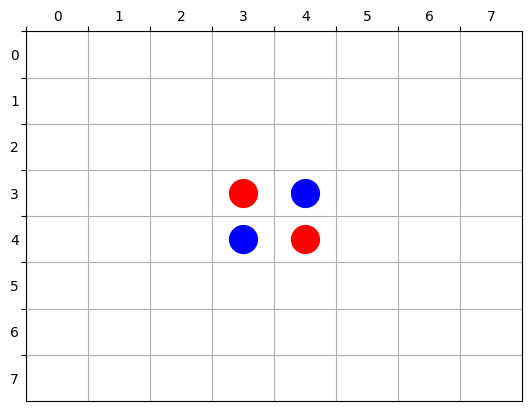

0


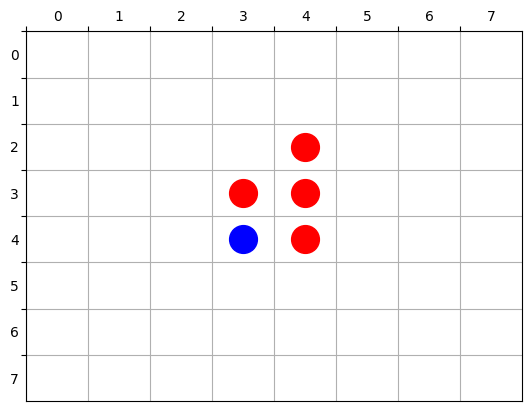

1


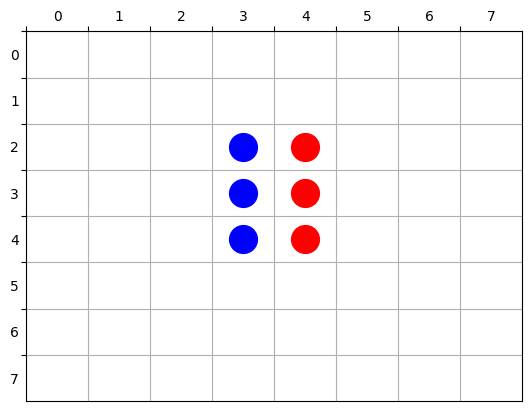

0


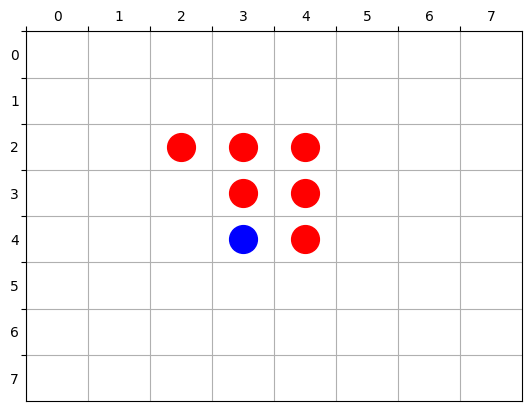

1


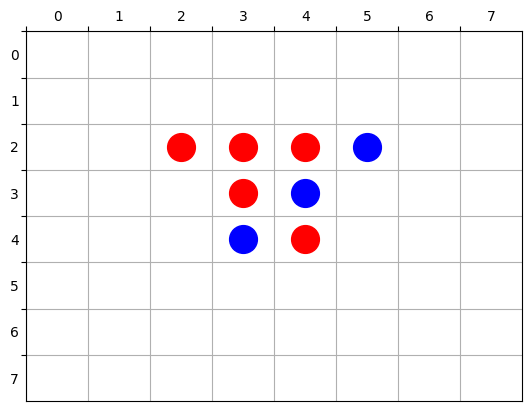

1


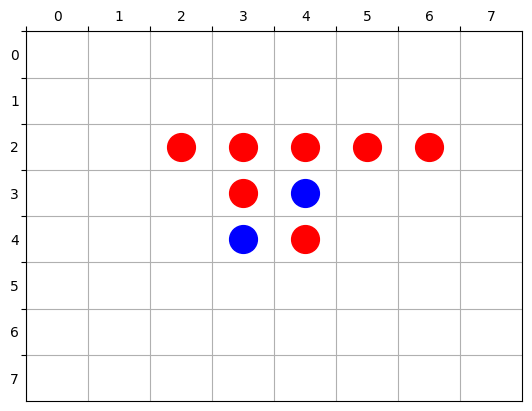

1


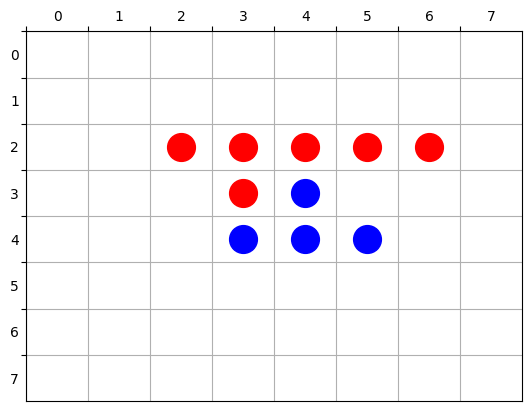

1


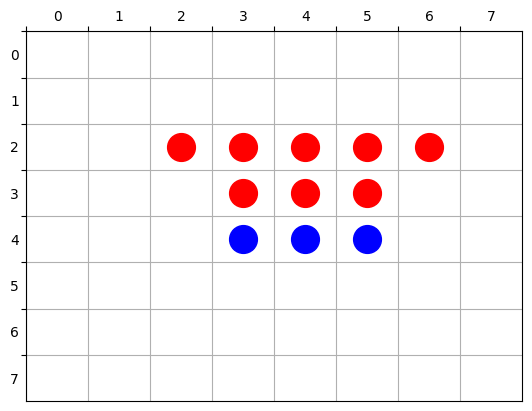

1


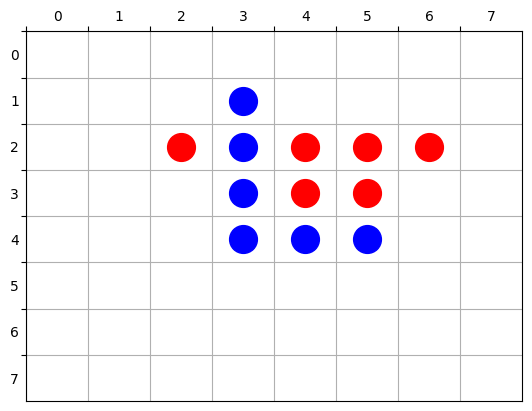

0


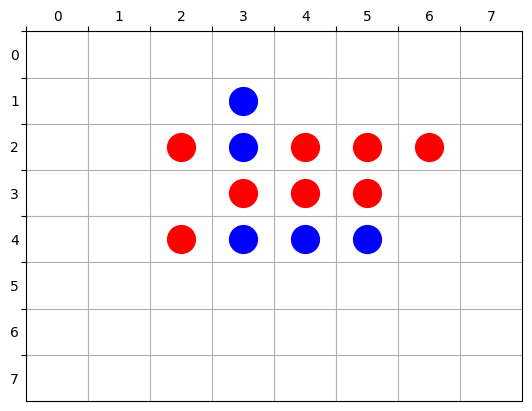

1


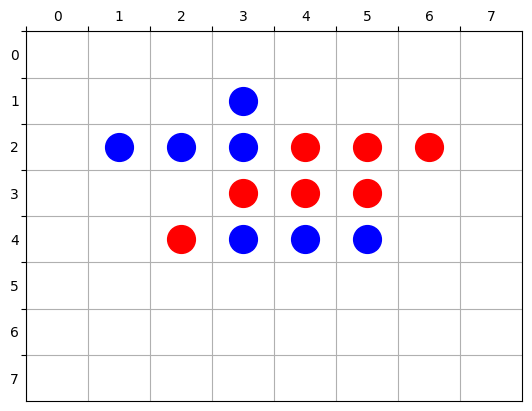

0


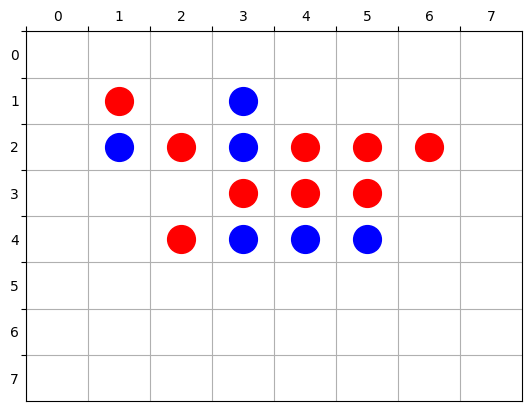

1


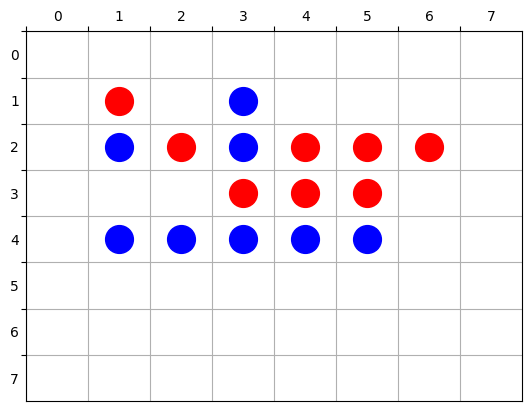

0


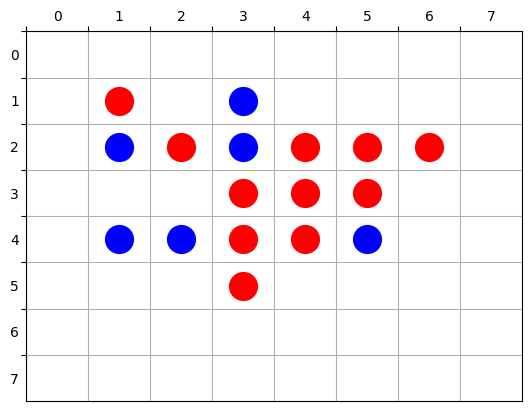

1


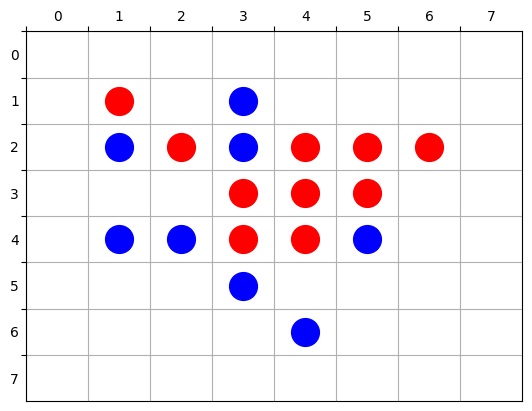

1


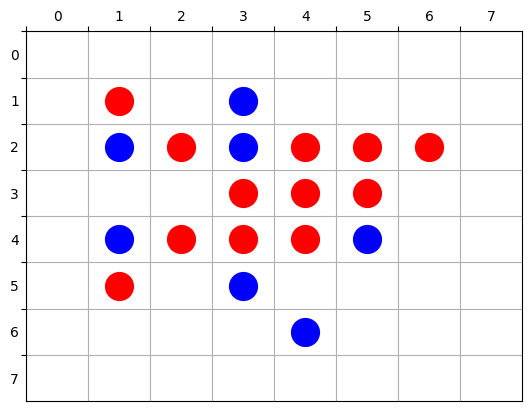

1


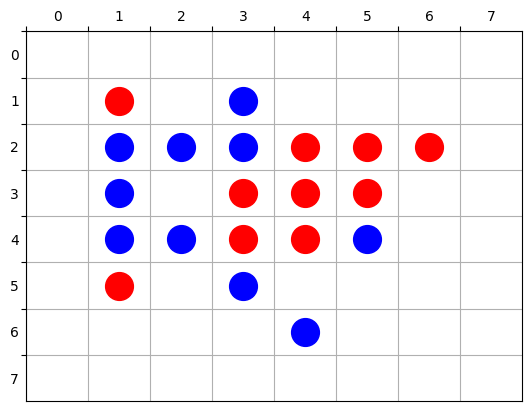

0


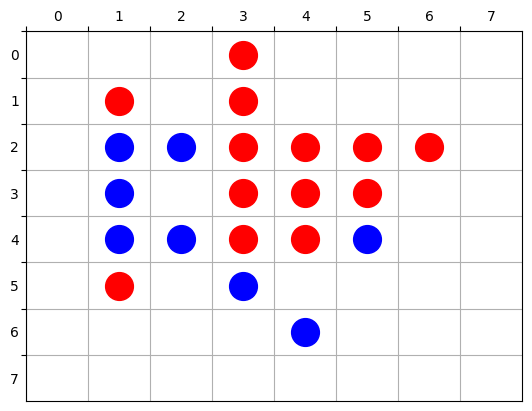

1


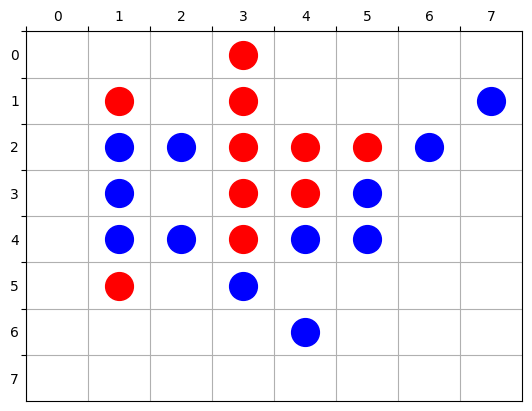

-1


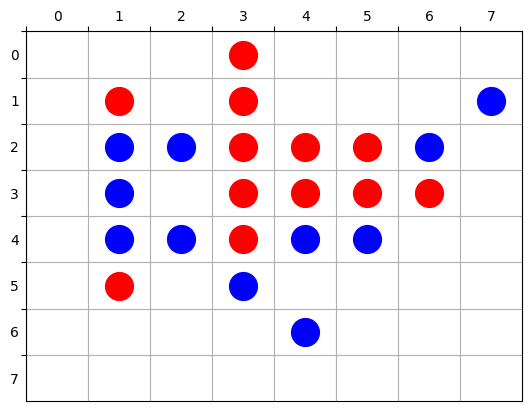

1


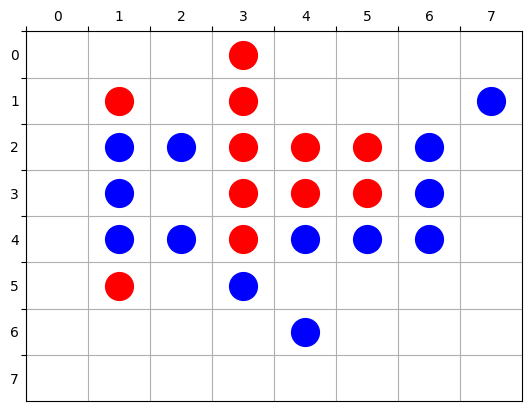

-1


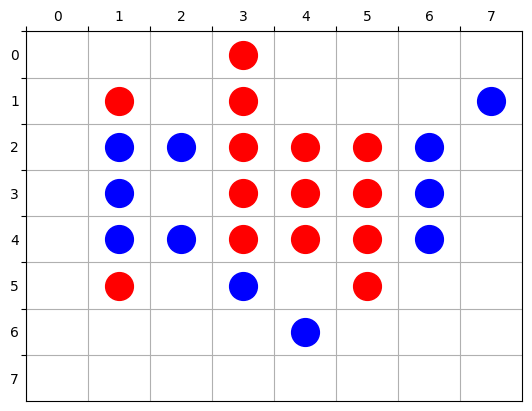

1


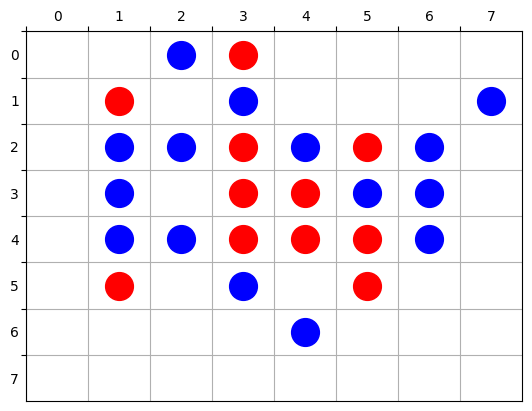

-1


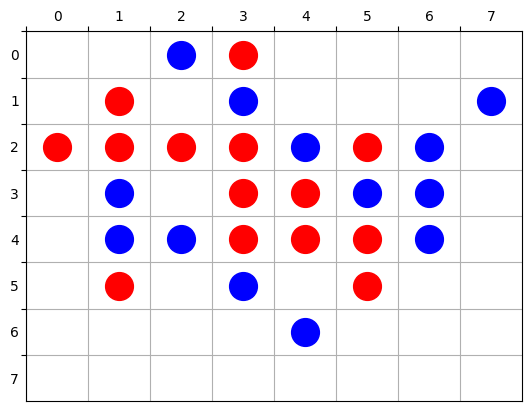

1


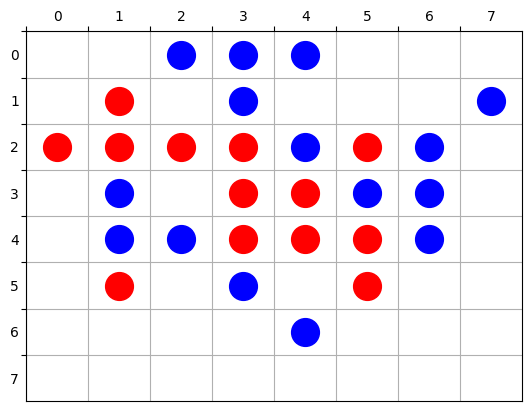

-1


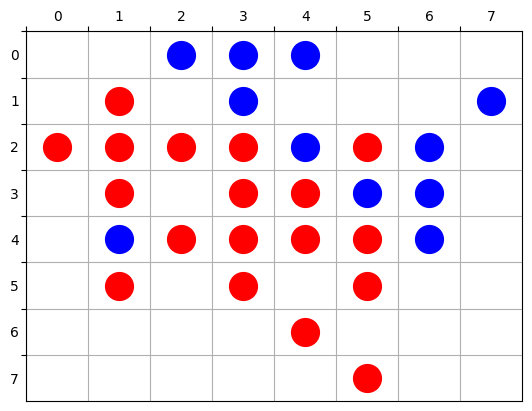

1


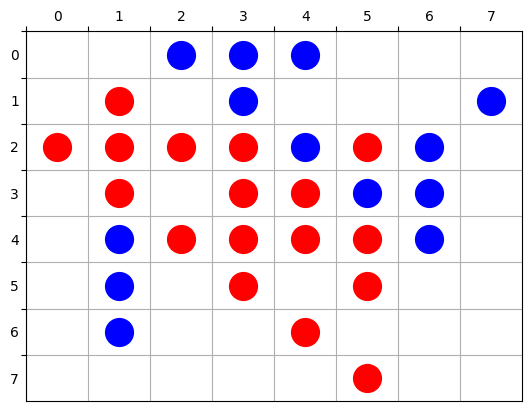

1


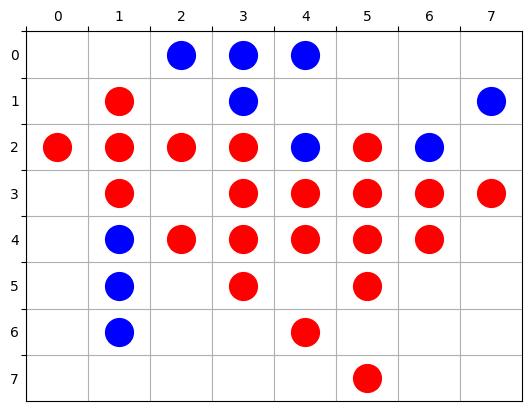

1


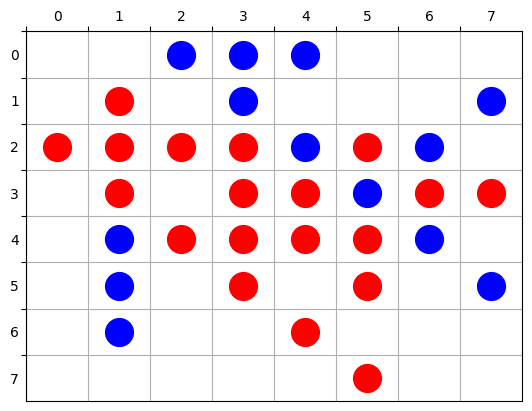

1


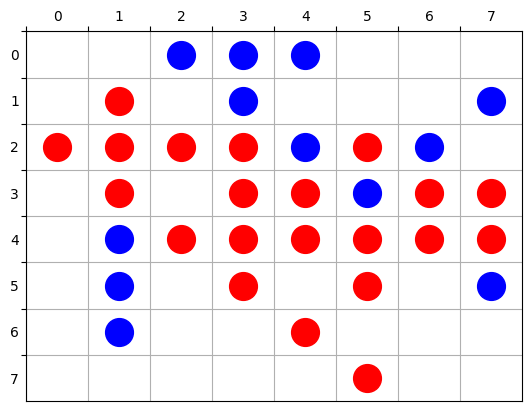

1


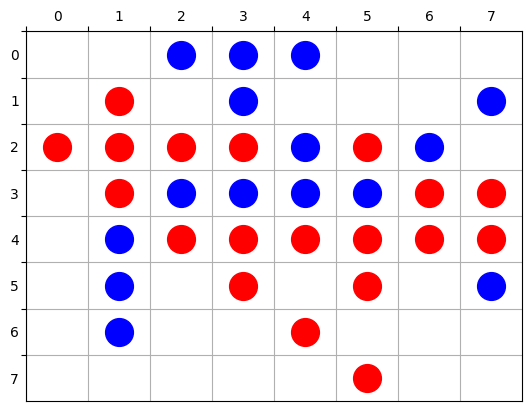

1


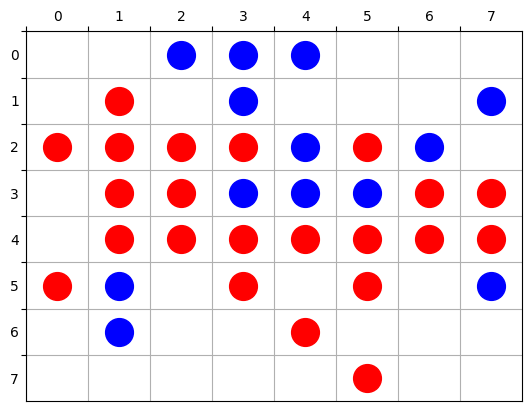

1


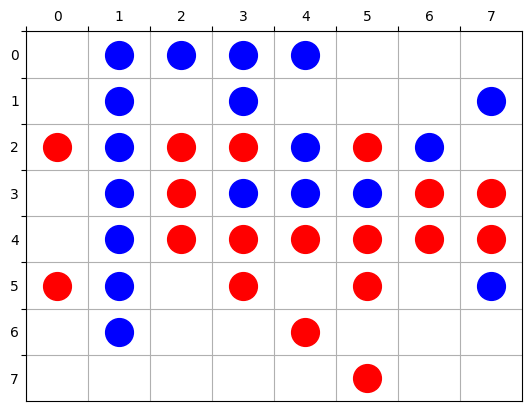

0


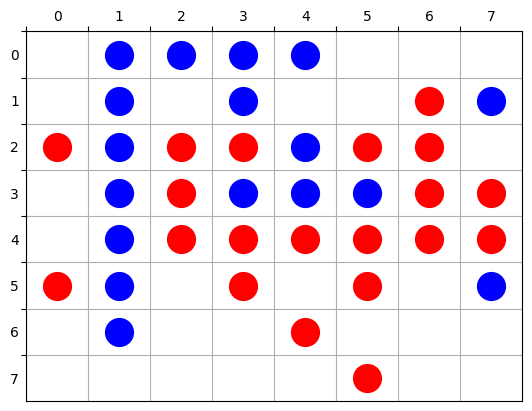

1


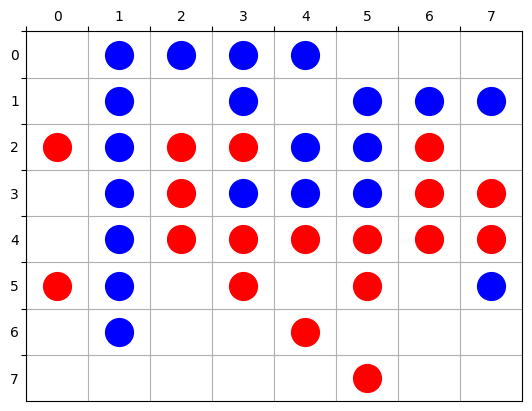

-1


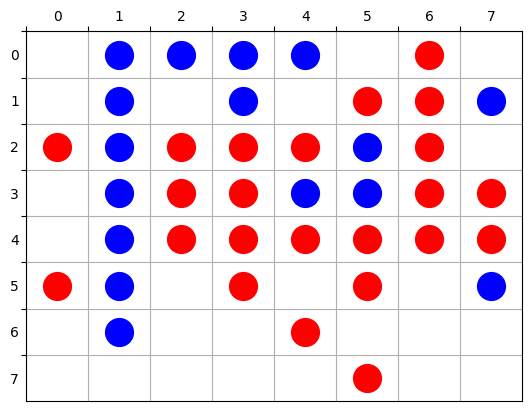

1


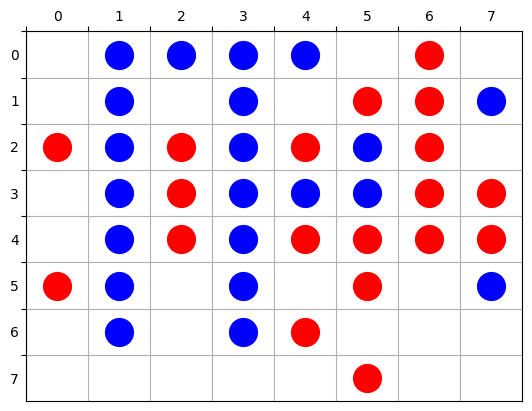

-1


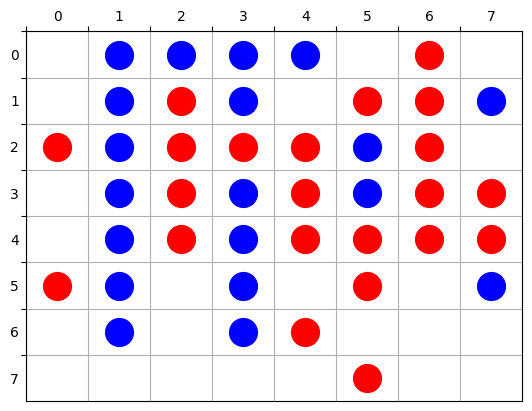

1


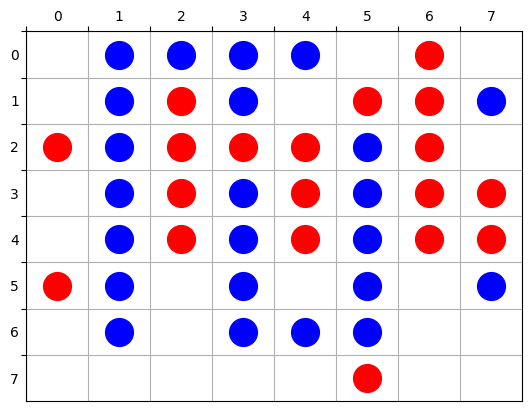

-1


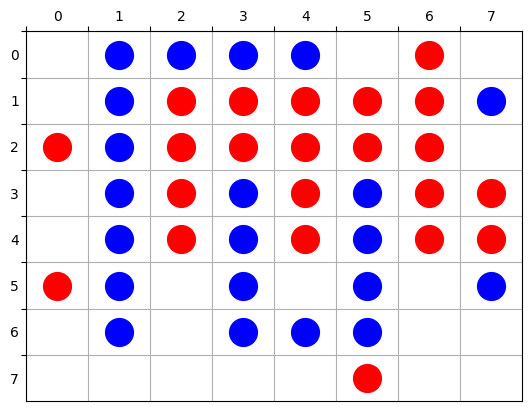

1


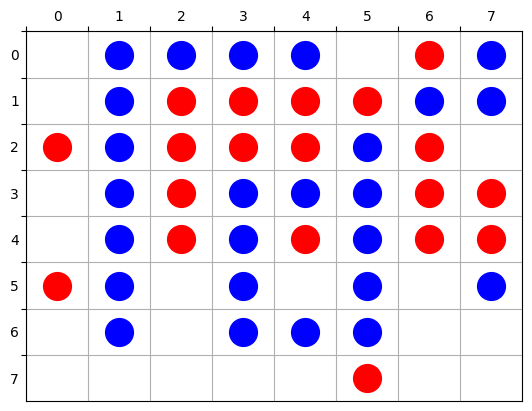

-1


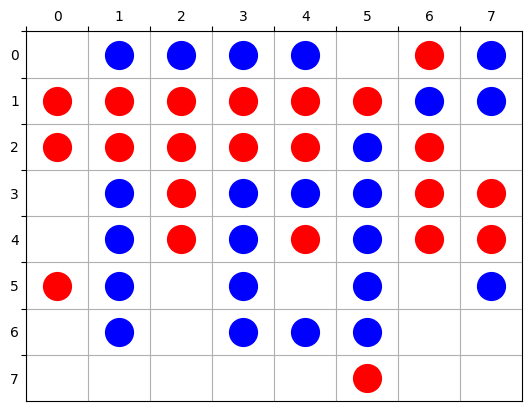

-1


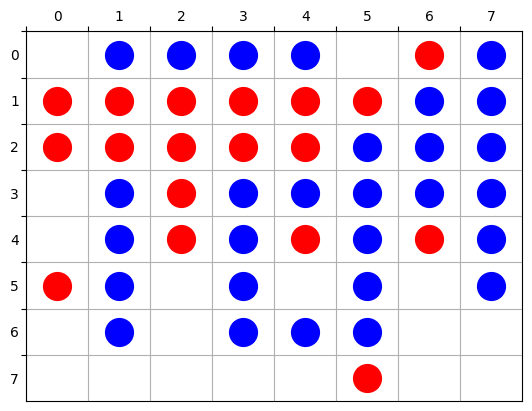

-1


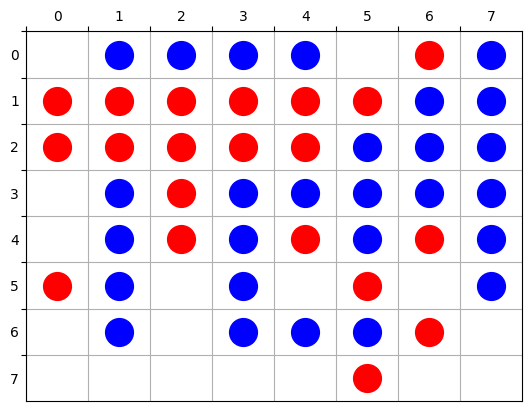

-1


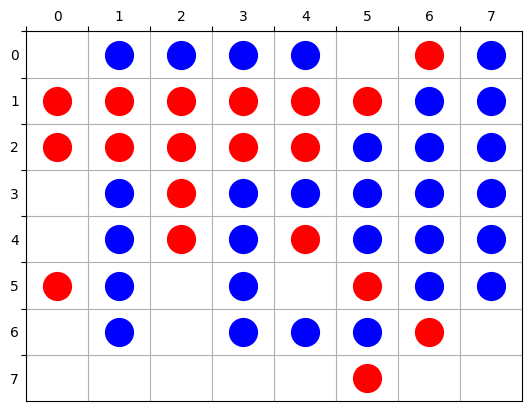

-1


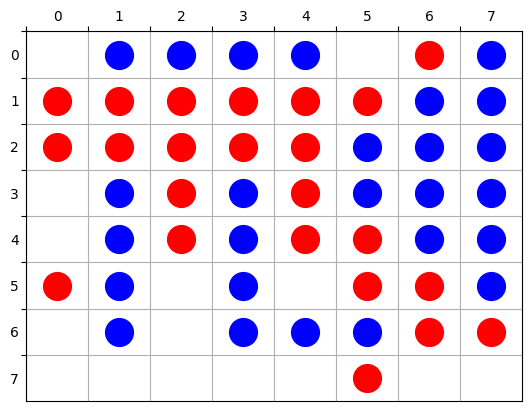

-1


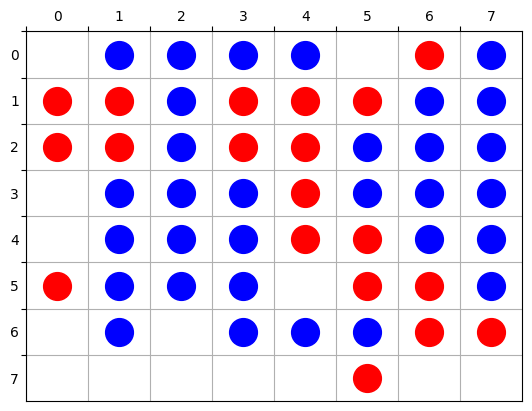

-1


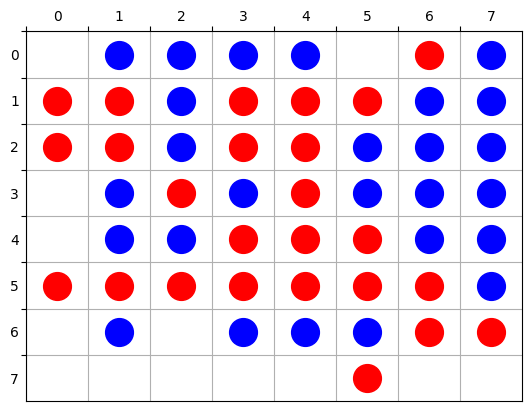

-1


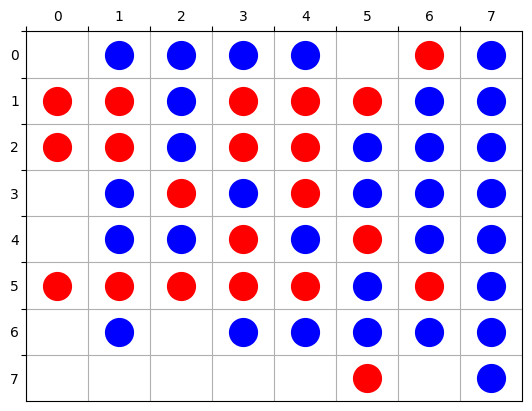

-1


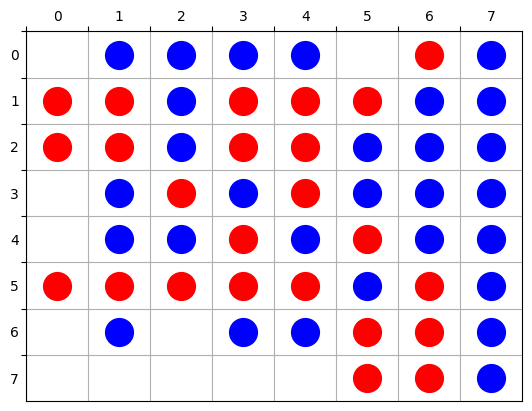

-1


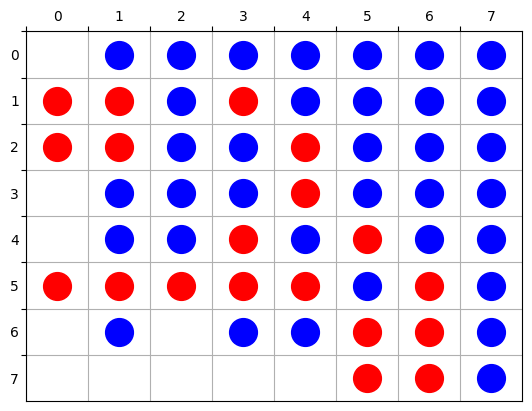

-1


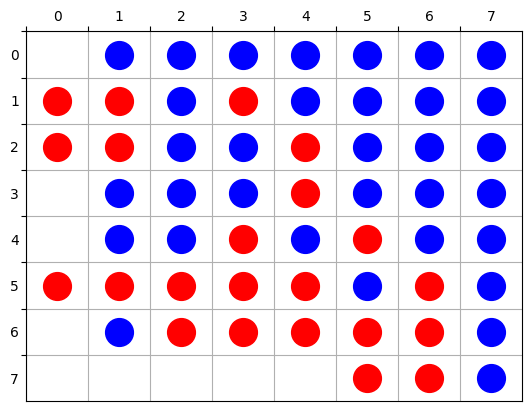

-1


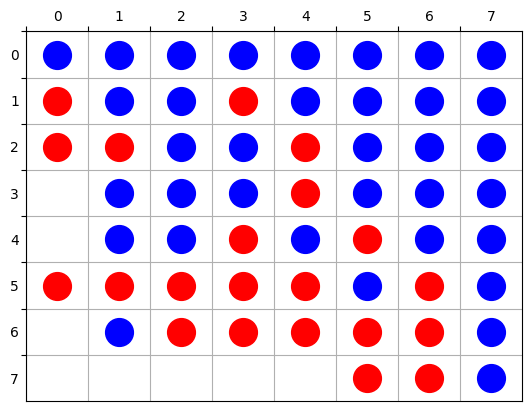

-1


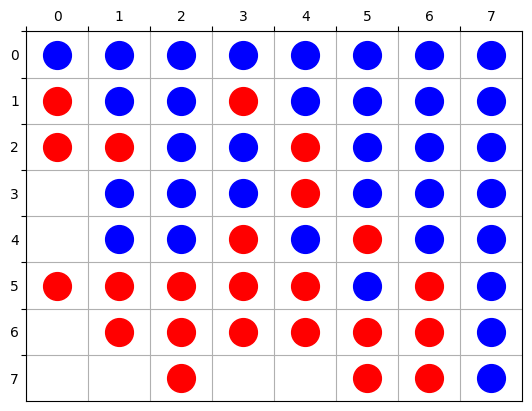

-1


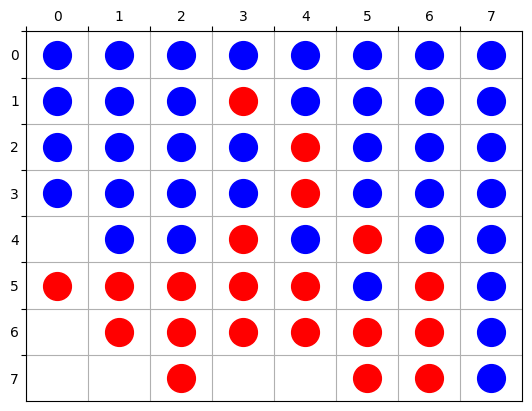

-1


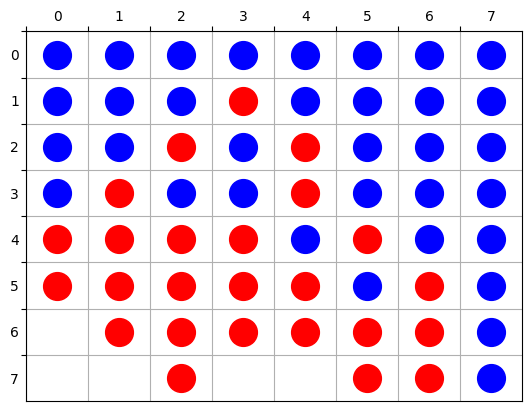

-1


In [11]:
tracerPlateau(jeux_au_hasard_visualisable(A, 1))

**Nous définissons une autre fonction, `essayer`, qui est utilisée pour jouer un jeu aléatoire `n` fois sur une configuration `A` et calculer le pourcentage de gain de la pièce rouge.**

In [12]:
def jeux_au_hasard(A, c):    
    B = au_hasard(A, c)
    
    while len(transition(B, c)) >= 1:
        c = -c
        B = au_hasard(B, c)
        
    return score_othello((_,B))

In [13]:
jeux_au_hasard(A, 1)

1

In [14]:
def essayer(A, c, n):
    score_liste = []
    for i in range (n):
        score = jeux_au_hasard(A, c)
        score_liste.append(score)
    res = np.sum(score_liste)/n
    return res

Cette fonction `essayer` permet de jouer le jeu $n$ fois au hasard à partir de la configuration de `A` et calcule la moyenne des scores. Le score est défini comme suit : une pièce rouge gagne, le score est de $1$ ; une pièce bleue gagne, le score est de $-1$ ; un match nul, le score est de $0$.

In [15]:
essayer(A, 1, 100)

0.07

**A l'aide de la méthode d'apprentissage supervisée de votre choix, fabriquer une fonction de score qui permet d'évaluer une position.**

Nous avons essayé de calculer le nombre de toutes les configrations possibles.

In [16]:
def nombre_de_echantillon(A,c):
    global nombre
    if transition(A, c) != 0:
        n = len(transition(A, c))
        for i in range(n):
            B = transition(A, c)[i]
            nombre += nombre_de_echantillon(B,-c)            
        return nombre
    else:
        return 0                          

In [17]:
# nombre = len(transition(A, 1))
# nombre_de_echantillon(A,1)

Nous voulons trouver le nombre de toutes les configurations pour déterminer la taille de l'ensemble d'apprentissage, mais ce nombre est si grand qu'il est difficile pour l'ordinateur de calculer le résultat.

In [18]:
def configuration_possible(A,c):
    B = au_hasard(A, c)
    compteur = 0
    ran = random.randint(1, 60)
    
    while len(transition(B, c)) >= 1:
        c = -c
        B = au_hasard(B, c)
        compteur += 1
        if compteur == ran:
            break
        
    return B,c

Cette fonction `configuration_possible` permet de générer une configuration aléatoire des configurations possibles.

**Suggestions d'optimisation** \: Cependant, l'utilisation de nombres aléatoires pour déterminer comment trouver un tour particulier est moins efficace ici et peut être optimisée en spécifiant simplement le nombre de tours pour réduire la charge de travail de l'ordinateur.

(None, -1, 0.55)

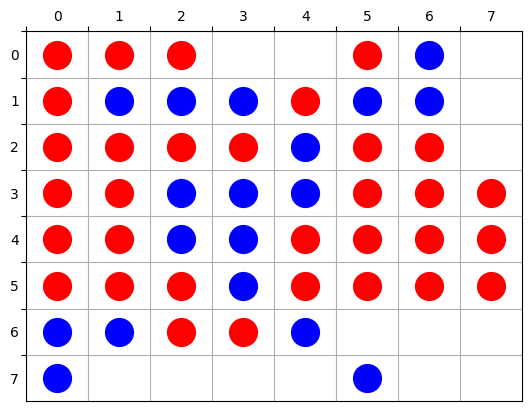

In [19]:
tracerPlateau(configuration_possible(A,1)[0]),configuration_possible(A,1)[1],essayer(configuration_possible(A,1)[0], configuration_possible(A,1)[1], 100)

In [20]:
configuration_possible(A,1)[0].flatten()

array([ 0, -1, -1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        0, -1,  1,  1,  0,  0, -1,  1,  1,  0, -1,  1,  1])

Nous générons maintenant 1000 configurations aléatoires et calculons leurs scores.

In [21]:
A = np.zeros((8,8), int)
A[3,3] = 1
A[3,4] = -1
A[4,3] = -1
A[4,4] = 1

In [41]:
x_train = [0 for i in range(300)]
y_train = [0 for i in range(300)]
for i in range(300):
    configuration = configuration_possible(A,1)
    con, c = configuration
    x_train[i] = con.flatten()
    y_train[i] = essayer(con, c, 100)
    print(i)
x_train = np.matrix(x_train)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = y_train*100
y_train = y_train.astype(int)
x_train,y_train

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(array([[ 0,  0,  0, ...,  1,  1,  1],
        [ 0, -1,  0, ...,  1,  1,  1],
        [ 0, -1,  0, ...,  1,  1,  1],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 0,  0, -1, ...,  1,  1,  1]]),
 array([  92,  100,  -10,  100,   92,  100,  100,  100,  100,  100,   94,
         100,   96,   94,  100,   94,  100,   89,   85,   90,   93,   94,
         100,  100,  100,  100,   85,   90,   85,   90,   78,  100,   98,
         100,  100,  100,  100,   84,  100,   98,  100,  100,  100,  100,
         100,   96,   92,  100,   84,   98,  100,  100,  100,   82,   76,
         100,   76,   90, -100,   72,  100,   96,  100,  100,  100,  100,
          96,   69,  100,   94,   81,  100,  100, -100,   79,   76,   46,
          75,  100,  100,   87,   92,  100,  100,  100, -100,   89,  100,
          86,   98,  100,   95,   98,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,   98,  100,  100,   94,  100,  100,
         10

Il n'est peut-être pas judicieux de commencer par une liste de tous les zéros pour `x_train` et `y_train`. Envisagez d'utiliser d'autres modes de stockage des données lors de l'optimisation.

Nous traitons les données de `x_train` et `y_train` de manière à ce qu'elles puissent être utilisées dans le `KNN`.

In [42]:
x_train.shape, y_train.shape

((300, 64), (300,))

In [43]:
configuration_possible(A,1)[0].flatten()

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [44]:
my_KNN = KNN()
my_KNN.fit(x_train, y_train)  # Apprentissage
my_KNN.predict([configuration_possible(A,1)[0].flatten()])[0], my_KNN.score(x_train, y_train) # Reconnaissance

(100, 0.5966666666666667)

Nous définissons une fonction `score_prevu` permettant de prédire la probabilité qu'une pièce rouge gagne dans une certaine configuration.

In [45]:
def score_prevu(C):
    c, A = C
    A = A.copy()
    B = A.flatten()
    score = np.array(my_KNN.predict([B])[0]/100)
    return score

# But 3
Utiliser cette fonction de score pour implémenter une fonction permettant de jouer à l'aide de l'algorithme MinMax ou Alpha–Beta.

In [46]:
def minmax(transition, score, A, c, p):
    if p == 0:
        return score(A), A
    
    score_max = -c * np.inf
    Bmax = A
    for B in transition(A):
        u, _ = minmax(transition, score, B, -c, p - 1)
        if c * u >= c * score_max:
            score_max = u
            Bmax = B
            
    return score_max, Bmax

In [47]:
def transition_othello(C):
    c, A = C
    n, m = A.shape
    liste = []
    for i in range(n):
        for j in range(m):
            if np.sum(jouer(A, c, i, j)) != n * m * 2 and A[i,j] == 0:
                 liste.append((-c, jouer(A, c, i, j)))
    return liste

pour p = 2:

3.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


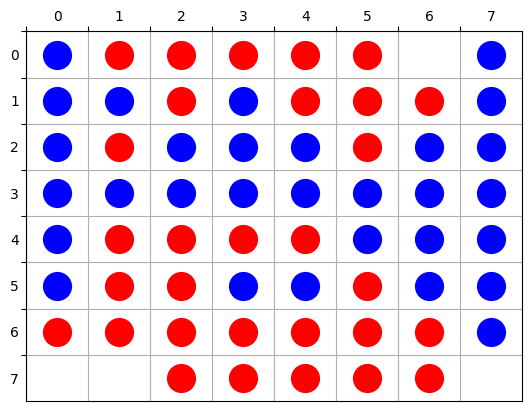

In [48]:
%%timeit -n 1 -r 1
import warnings
warnings.filterwarnings("ignore")

c = 1
A = np.zeros((8,8), int)
A[3,3] = 1
A[3,4] = -1
A[4,3] = -1
A[4,4] = 1

for _ in range(60):
    _, (c,A) = minmax(transition_othello, score_prevu, (c,A), c, 2)
    #plt.figure()
    #plt.show()
    #print(_)
tracerPlateau(A)

Comme on doit controle le temps au maximum ~10 secondes, donc on choisit p = 2

pour p = 3

29.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


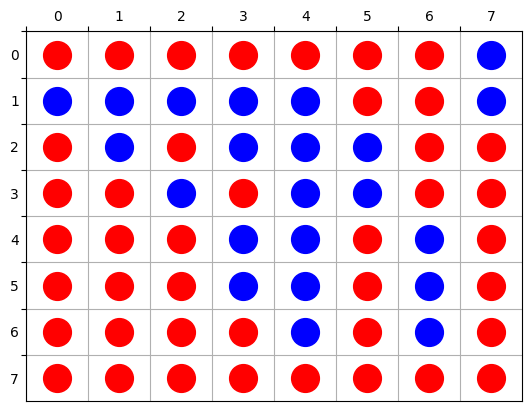

In [49]:
%%timeit -n 1 -r 1
import warnings
warnings.filterwarnings("ignore")

c = 1
A = np.zeros((8,8), int)
A[3,3] = 1
A[3,4] = -1
A[4,3] = -1
A[4,4] = 1

for _ in range(60):
    _, (c,A) = minmax(transition_othello, score_prevu, (c,A), c, 3)
    #plt.figure()
    #plt.show()
    #print(_)
tracerPlateau(A)

pour p = 4:

4min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


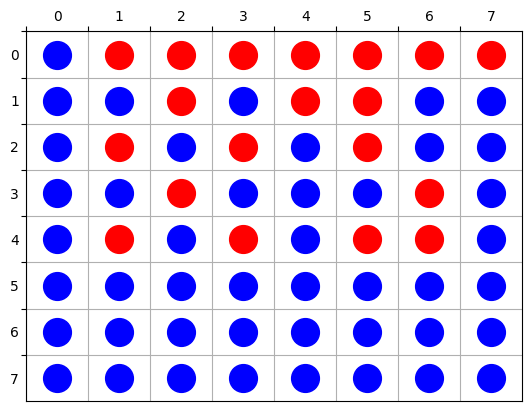

In [50]:
%%timeit -n 1 -r 1
import warnings
warnings.filterwarnings("ignore")

c = 1
A = np.zeros((8,8), int)
A[3,3] = 1
A[3,4] = -1
A[4,3] = -1
A[4,4] = 1

for _ in range(60):
    _, (c,A) = minmax(transition_othello, score_prevu, (c,A), c, 4)
    #plt.figure()
    #plt.show()
    #print(_)
tracerPlateau(A)

In [51]:
def coup_suivant(A,c):
    _, (c,A) = minmax(transition_othello, score_prevu, (c,A), c, 3)
    A1 = A
    tracerPlateau(A1)
    return A1

Cette fonction `coup_suivant` choisit la meilleure stratégie!

# But 4
Si possible, proposer et implémenter une méthode de votre choix pour améliorer la fonction de score, ou l'algorithme qui calcul le meilleur coup.

## Question 1 : Échantillons inégals

- Techniques de rééchantillonnage : En rééchantillonnant le jeu de données, on peut équilibrer les proportions des échantillons entre la classe majoritaire et la classe minoritaire. L'une des méthodes est la sous-échantillonnage, c'est-à-dire la suppression aléatoire des échantillons de la classe majoritaire ; l'autre méthode est la sur-échantillonnage, c'est-à-dire la duplication des échantillons de la classe minoritaire ou la génération de nouveaux échantillons de cette classe.
- Vote pondéré des K plus proches voisins : Dans l'algorithme KNN, on peut donner un poids aux K échantillons les plus proches pour accorder une importance accrue aux échantillons de la classe minoritaire dans les résultats de classification.

## Question 2 : Trop de calculs

Nous utilisons un autre algorithme dérivé du KNN mais plus efficace, l'arbre kd.

L'arbre kd (K-dimension tree) est une structure de données en forme d'arbre utilisée pour stocker des points d'instance dans un espace k-dimensionnel afin de les rechercher rapidement. 

L'arbre kd est un arbre binaire qui représente une division dans l'espace k-dimensionnel. 

La construction de l'arbre kd consiste à diviser continuellement l'espace k-dimensionnel avec des hyperplans perpendiculaires aux axes de coordonnées, créant ainsi une série de régions hyper-rectangulaires k-dimensionnelles. 

Chaque nœud de l'arbre kd correspond à une région hyper-rectangulaire k-dimensionnelle. 

En utilisant l'arbre kd, il est possible de réduire le calcul des recherches en évitant la recherche de la plupart des points de données. Cela permet de réduire considérablement la complexité du calcul de la recherche.